Para a apresentação final da nossa análise para o Alura Voz, precisamos definir o melhor modelo e utilizar os melhores hiperparametros nele.

### Importando bibliotecas

Para a aplicação utilizaremos `pandas`, `seaborn`, `sklearn`, `imblearn` e `sys`.

In [34]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd

from utils.utils import plot_matriz_confusao
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

SEED = 42

## Otimizando o modelo

Sabendo que é preciso escolher o melhor modelo desenvolvido, faremos uma análise do resultado obtido no [estudo anterior](https://github.com/sthemonica/challenge_dados_1/blob/bruno/3-Modelos%20de%20ML/modelos.ipynb), ordenado pelo valor de Recall:

<h3>Tabela dos modelos ordenada pelo Recall</h3>

|    | Modelo        |   Acurácia Treino |   Acurácia Teste |   Precisão |   Recall |   F1-Score |
|---:|:--------------|------------------:|-----------------:|-----------:|---------:|-----------:|
|  0 | random forest |          0.809818 |         0.800928 |   0.769395 | 0.849843 |   0.80762  |
|  1 | decision tree |          0.814715 |         0.804407 |   0.776335 | 0.845912 |   0.809631 |
|  2 | svc           |          0.751965 |         0.750676 |   0.733086 | 0.775157 |   0.753535 |

O ***Recall*** é uma métrica que avalia se as previsões positivas foram dadas corretamente, ou seja, avalia a quantidade de Verdadeiros Positivos (True Pos) e Falsos Negativos (False Neg). De forma que, quanto maior o Recall mais acertos o modelo obteve. 

Dessa forma, utilizaremos o modelo que obteve o melhor Recall, sendo assim, o Random Forest.

Tendo escolhido o melhor modelo, utilizaremos o [GridSearchCV](https://cursos.alura.com.br/course/machine-learning-otimizacao-de-modelos-atraves-de-hiperparametros/task/48715) para otimizá-lo.

Agora, vamos ler o conjunto de dados trabalhado no notebook anterior `modelos.ipynb` através do método `read_json` do pandas:

In [57]:
dados = pd.read_json("../Dados/Telco-Customer-Churn-balanceamento.json")
dados.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Churn
0,1,0,1,1,9,1,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
1,0,0,0,0,9,1,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,0,0,0,0,4,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1
3,0,1,1,0,13,1,0,0,1,1,...,0,1,0,1,0,0,0,1,0,1
4,1,1,1,0,3,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,1


Para otimizar o modelo, primeiro precisamos criar o conjunto de treino de teste. Desse modo, dividimos o conjunto de dados em entrada (X) e saida (y), ou alvo.

In [13]:
X = dados.drop(['Churn'], axis=1)
y = dados['Churn']

E assim podemos separar os dados em treino e teste com `train_test_split`.

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

É preciso definir os hiperparâmetros a serem otimizados pelo GridSearchCV, os quais:

* **`n_estimators`**: número de árvores de decisão;
* **`criterion`**: critério de decisão;
* **`max_features`**: número máximo de variáveis a serem utilizadas ao procurar melhor divisão;
* **`max_depth`**: profundidade máxima da árvore de decisão;
* **`min_samples_split`**: número mínimo de amostras necessárias para que uma divisão seja feita;
* **`min_samples_leaf`**: número mínimo de amostras necessárias para que uma folha seja formada;
* **`bootstrap`**: indica se foi realizada uma reamostragem dos dados na criação dos modelos de árvore de decisão.

In [17]:
n_estimators = np.arange(100, 200, step=20)	
criterion = ["gini", "entropy"]  
max_features = ["auto", "log2"]
max_depth = list(np.arange(2, 10, step=2))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [2, 4]
bootstrap = [True, False]

parameters = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

Agora, podemos utilizar o otimizador GridSearchCV para melhorar a mética *Recall*. Para isso, foi criado um objeto GridSearchCV e nele foi passado como parâmetros o nosso modelo, os hipermparametros definidos anteriormente e a métrica a ser otimizada, *Recall*. Bem como, realizamos o ajuste com o método `fit()`.

Para saber mais sobre o GridSearchCV e seus parrâmetros você pode consultar a [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
clf = GridSearchCV(RandomForestClassifier(random_state=SEED), parameters, cv=3, n_jobs=-1, scoring="recall")
clf.fit(x_train, y_train)  # ajuste com os dados de treino

Após o ajuste, conseguimos analisar os resultados obtidos:

In [24]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1230,2.795735,0.710900,0.137522,0.014510,False,entropy,8,auto,4,6,100,"{'bootstrap': False, 'criterion': 'entropy', '...",0.894615,0.890085,0.886241,0.890314,0.003423,1
925,1.476667,0.158846,0.115731,0.005462,False,gini,8,log2,2,4,100,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.892308,0.889316,0.889316,0.890313,0.001410,2
1245,1.688358,0.039428,0.196186,0.037705,False,entropy,8,log2,2,4,100,"{'bootstrap': False, 'criterion': 'entropy', '...",0.895385,0.886241,0.888547,0.890058,0.003883,3
1213,3.567250,0.136539,0.237953,0.032301,False,entropy,8,auto,2,6,160,"{'bootstrap': False, 'criterion': 'entropy', '...",0.894615,0.892390,0.883167,0.890058,0.004956,4
1217,2.636150,0.202752,0.212012,0.018872,False,entropy,8,auto,2,8,140,"{'bootstrap': False, 'criterion': 'entropy', '...",0.898462,0.883935,0.885473,0.889290,0.006516,5


Para obtermos os melhores resultados do otimizador utilizamos o comando **`best_params_`**:

In [29]:
clf.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 100}

Com isso, conseguimos criar um estimador de Random Forest com os melhores hiperparâmetros:

In [30]:
rforest = RandomForestClassifier(**clf.best_params_, random_state=SEED)

In [31]:
model = rforest.fit(x_train, y_train)  # treinamento com os dados de treino
y_pred = rforest.predict(x_test)  # realizando as predições

Podemos analisar assim, se o modelo realmente obteve resultados melhores na métrica de *Recall* utilizanod a função `plot_matriz_confusao`:

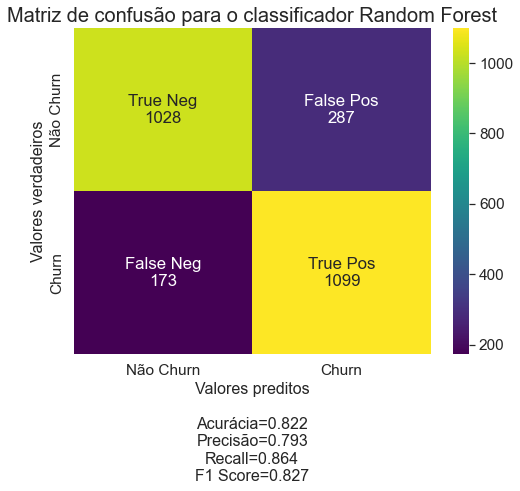

In [35]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["Não Churn", "Churn"]
plot_matriz_confusao(y_test,
                      y_pred,
                      group_names=labels,
                      categories=categories,
                      figsize=(8, 6), 
                      title="Matriz de confusão para o classificador Random Forest")

In [58]:
print(f"Acurácia de treinamento: {rforest.score(x_train, y_train) * 100:.2f}%")  # Verificando a acurácia de treinamento

Acurácia de treinamento: 84.89%


Percebe-se que o recall e as outras métricas aumentaram com o modelo otimizado.

<h4>Antes da otimização</h4>

|    | Modelo        |   Acurácia Treino |   Acurácia Teste |   Precisão |   Recall |   F1-Score |
|---:|:--------------|------------------:|-----------------:|-----------:|---------:|-----------:|
|  0 | random forest |          0.809818 |         0.800928 |   0.769395 | 0.849843 |   0.80762  |

<h4>Depois da otimização</h4>

|    | Modelo        |   Acurácia Treino |   Acurácia Teste |   Precisão |   Recall |   F1-Score |
|---:|:--------------|------------------:|-----------------:|-----------:|---------:|-----------:|
|  0 | random forest |          0.848859 |         0.822 |   0.793 | 0.864 |   0.827  |


Desse modo, conseguimos criar um modelo bem otimizado e assim, apresentá-lo ao Alura Voz! :D